# Running Window alpha component

## Nocodazole Treatment

In [31]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [32]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6

In [33]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Nocodazole_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [34]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    combined_df = pd.concat(dfs)
    return combined_df 

In [41]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, '- Noco')
df_condition2 = load_and_label_files(csv_files_2, '+ Noco, 30 mins')
df_condition3 = load_and_label_files(csv_files_3, '+ Noco, 60 mins')

In [42]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [43]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes'] > mean_step_sizes_threshold]

In [44]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

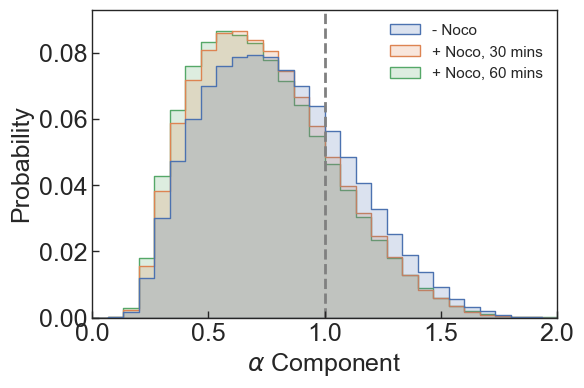

In [47]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6,4))
ax = sns.histplot(
    data=final_filtered_df,
    x='alpha',
    hue='Condition',
    bins=30,
    binrange = (0,2),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)
plt.axvline(1, ls="--", c="gray", lw=2)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlim(0, 2)
plt.ylim(0, 0.093)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

## LatrunculinA Treatment

In [1]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [2]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_30 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for LatrunculinA_60 mins",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [4]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    combined_df = pd.concat(dfs)
    return combined_df 

In [5]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, '- LatA')
df_condition2 = load_and_label_files(csv_files_2, '+ LatA, 30 mins')
df_condition3 = load_and_label_files(csv_files_3, '+ LatA, 60 mins')

In [6]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [7]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes'] > mean_step_sizes_threshold]

In [8]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

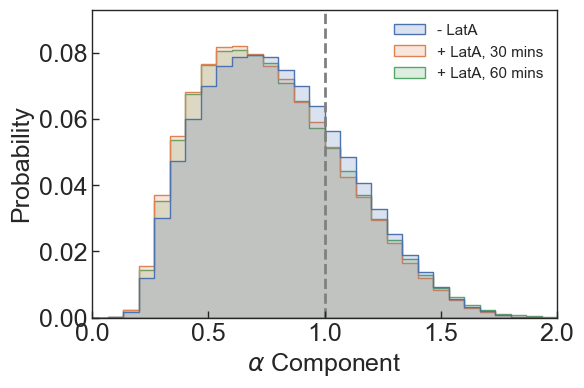

In [9]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6,4))
ax = sns.histplot(
    data=final_filtered_df,
    x='alpha',
    hue='Condition',
    bins=30,
    binrange = (0,2),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)
plt.axvline(1, ls="--", c="gray", lw=2)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlim(0, 2)
plt.ylim(0, 0.093)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

## Single Condition alpha distribution

In [7]:
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [8]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

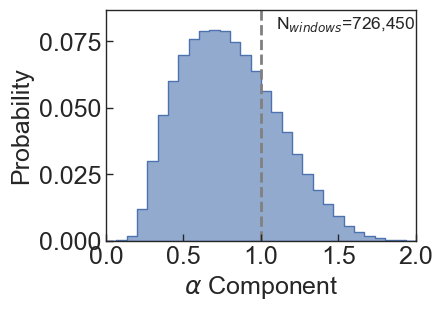

In [23]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6



df_list = []


for file in csv_files:

    df = pd.read_csv(file)
    df_list.append(df)


combined_df = pd.concat(df_list, ignore_index=True)

filtered_by_step_size = combined_df[
    (combined_df["mean_step_sizes"] > mean_step_sizes_threshold)
]

final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

n_window = final_filtered_df.dropna(subset=['alpha']).shape[0]


plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=final_filtered_df,
    x="alpha",

    bins=30,

    binrange=(0, 2),

    stat="probability",
    element="step",

    common_norm=False,

    fill=True,

    alpha=0.6,

)

plt.axvline(1, ls="--", c="gray", lw=2)
plt.text(
    1.1,
    0.08,
    r"N$_{windows}$=" + f"{n_window:,}",
    fontdict={"fontsize": 12.5},
)


plt.xlim(0, 2)
plt.ylim(0, 0.087)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

## R2 distribution

In [24]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [25]:
csv_files = filedialog.askopenfilenames(
    title="Select CSV Files for No drug_2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

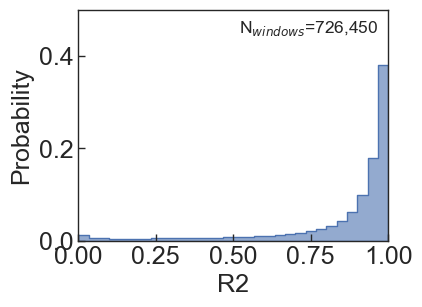

In [30]:
mean_step_sizes_threshold = 0.25  # in pixels



df_list = []


for file in csv_files:

    df = pd.read_csv(file)
    df_list.append(df)


combined_df = pd.concat(df_list, ignore_index=True)

filtered_by_step_size = combined_df[
    (combined_df["mean_step_sizes"] > mean_step_sizes_threshold)
]

n_window = final_filtered_df.dropna(subset=['alpha']).shape[0]



plt.figure(figsize=(4, 3))
plt.text(
    0.52,
    0.45,
    r"N$_{windows}$=" + f"{n_window:,}",
    fontdict={"fontsize": 12.5},
)
ax = sns.histplot(
    data=filtered_by_step_size,
    x="R2",
    bins=30,
    binrange=(0, 1),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.6,
)

# plt.axvline(1, ls="--", c="gray", lw=2)
# plt.text(
#     0.09,
#     0.0625,
#     r"N$_{windows}$=" + f"{n_window:,}",
#     fontdict={"fontsize": 12.5},
# )


plt.xlim(0, 1)
plt.ylim(0, 0.5)
plt.xlabel('R2', fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)

## alpha component distribution of HOPS vs PB

In [7]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [8]:
mean_step_size_threshold_nm = 30  
# R2_threshold = 0.9
conversion_factor = 117 

In [9]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for 1x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for 2x",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [10]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    combined_df_list = []
    for file in file_paths:
        df = pd.read_csv(file)
        df['Condition'] = label
        df['title'] = basename(file)
        combined_df_list.append(df)
    combined_df = pd.concat(combined_df_list, ignore_index=True)
    return combined_df

In [11]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'PB')
df_condition2 = load_and_label_files(csv_files_2, 'HOPS')

In [12]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2], ignore_index=True)
df_combined['mean_step_sizes_nm'] = df_combined['mean_step_sizes'] * conversion_factor

In [13]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes_nm'] > mean_step_size_threshold_nm]

In [15]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2_loglog'] > 0.6]

In [16]:
def calculate_unique_trackID_count(filtered_df, condition):
    condition_df = filtered_df[filtered_df['Condition'] == condition]
    unique_titles = condition_df['title'].unique()
    unique_trackID_count = 0
    for title in unique_titles:
        unique_trackID_count += condition_df[condition_df['title'] == title]['trackID'].nunique()
    return unique_trackID_count

In [17]:
n_PB = calculate_unique_trackID_count(final_filtered_df, 'PB')
n_HOPS = calculate_unique_trackID_count(final_filtered_df, 'HOPS')

c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\bisal\.conda\envs\spt-simplified-20240126\lib\site-packages\seaborn\_core.py:1006: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

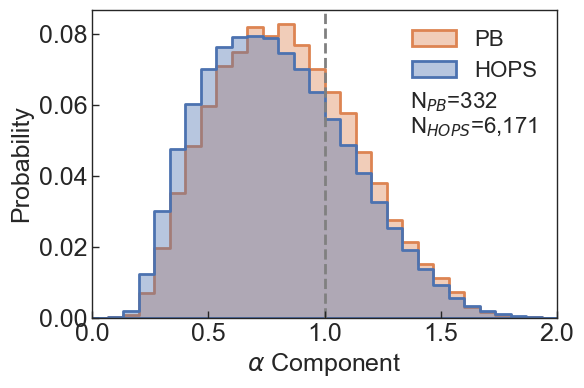

In [23]:
# Plot the probability distribution for each condition without KDE

color_dict = {"PB": "#DD8452", "HOPS": "#4C72B0"}
plt.figure(figsize=(6, 4))
bins = 30
ax = sns.histplot(
    data=final_filtered_df,
    x="alpha",
    hue="Condition",
    bins=bins,
    stat="probability",
    common_norm=False,
    binrange=(0, 2),
    lw=2,
    element="step",
    fill=True,
    alpha=0.4,
    palette=color_dict,
    hue_order=["HOPS", "PB"]
)
plt.axvline(1, ls="--", c="gray", lw=2)

# Modify legend order
handles = ax.legend_.legendHandles[::-1]  
ax.legend(handles, ['PB', 'HOPS'], fontsize=16)  

# Rest of your legend formatting
legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

# legend = ax.get_legend()
# legend.set_title(None)
# legend_frame = legend.get_frame()
# legend_frame.set_visible(False)

plt.text(
    1.3675, 0.059,
    r"N$_{PB}$=" + f"{n_PB:,}",
    fontdict={"fontsize": 16}
)

plt.text(
     1.3675, 0.052,
    r"N$_{HOPS}$=" + f"{n_HOPS:,}",
    fontdict={"fontsize": 16}
)

plt.xlim(0, 2)
plt.ylim(0, None)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=600)

## Alpha component analysis of PB vs HOPS vs Free diffusion Control

In [1]:
import os
from os.path import join, basename
from tkinter import filedialog
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set(color_codes=True, style="white")

In [2]:
mean_step_sizes_threshold = 0.25  # in pixels
R2_threshold = 0.6

In [3]:
# Use file dialog to select CSV files for each condition
csv_files_1 = filedialog.askopenfilenames(
    title="Select CSV Files for PB",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_2 = filedialog.askopenfilenames(
    title="Select CSV Files for HOPS",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)
csv_files_3 = filedialog.askopenfilenames(
    title="Select CSV Files for Control",
    filetypes=(("CSV files", "*.csv"), ("All files", "*.*")),
)

In [4]:
# Function to load CSV files and add a 'Condition' column
def load_and_label_files(file_paths, label):
    dfs = [pd.read_csv(file) for file in file_paths]
    for df in dfs:
        df['Condition'] = label
    combined_df = pd.concat(dfs)
    return combined_df 

In [5]:
# Load and label CSV files for each condition
df_condition1 = load_and_label_files(csv_files_1, 'PB')
df_condition2 = load_and_label_files(csv_files_2, 'HOPS')
df_condition3 = load_and_label_files(csv_files_3, 'Control')

In [6]:
# Combine the data from all conditions
df_combined = pd.concat([df_condition1, df_condition2, df_condition3], ignore_index=True)

In [7]:
filtered_by_step_size = df_combined[df_combined['mean_step_sizes'] > mean_step_sizes_threshold]

In [8]:
final_filtered_df = filtered_by_step_size[filtered_by_step_size['R2'] > R2_threshold]

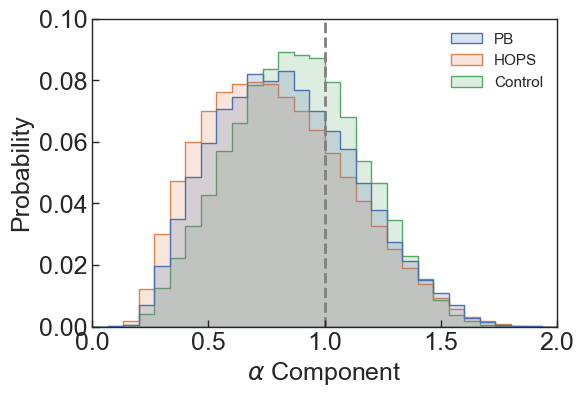

In [9]:
# Plot the probability distribution for each condition without KDE
plt.figure(figsize=(6,4))
ax = sns.histplot(
    data=final_filtered_df,
    x='alpha',
    hue='Condition',
    bins=30,
    binrange = (0,2),
    stat="probability",
    element="step",
    common_norm=False,
    fill=True,
    alpha=0.2  
)
plt.axvline(1, ls="--", c="gray", lw=2)

legend = ax.get_legend()
legend.set_title(None)
legend_frame = legend.get_frame()
legend_frame.set_visible(False)

plt.xlim(0, 2)
plt.ylim(0, 0.1)
plt.xlabel(r"$\alpha$ Component", fontsize=18)
plt.ylabel("Probability", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.gca().tick_params(axis="both", which="major", labelsize=18)
plt.savefig("alpha_histo.png", format="png", bbox_inches="tight", dpi=300)